In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
data=pd.read_csv("/content/Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
data.duplicated().sum()

0

<Axes: xlabel='price', ylabel='area'>

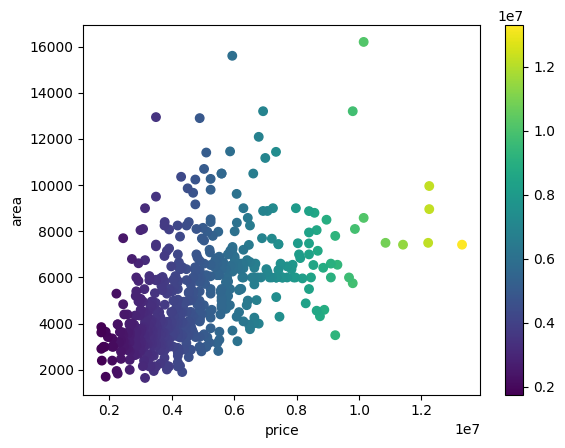

In [ ]:
data.plot(kind='scatter', x='price', y='area', s=37, alpha=1, c=data['price'], cmap='viridis')


In [ ]:
import matplotlib.pyplot as plt


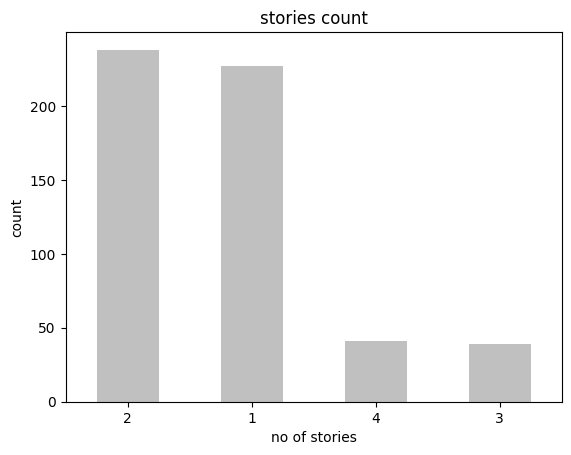

In [ ]:
story=data['stories'].value_counts()
story.plot(kind='bar',color='silver')
plt.title('stories count')
plt.xlabel('no of stories')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

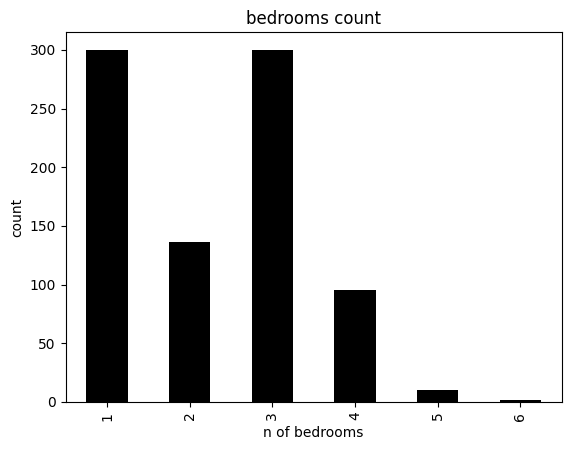

In [ ]:
bedrooms=data['bedrooms'].value_counts()
bedrooms.plot(kind='bar',color='black')
bedrooms_count_sorted=bedrooms.sort_index()
bedrooms_count_sorted.plot(kind='bar',color='black')
plt.title('bedrooms count')
plt.xlabel('n of bedrooms')
plt.ylabel('count')
plt.show()

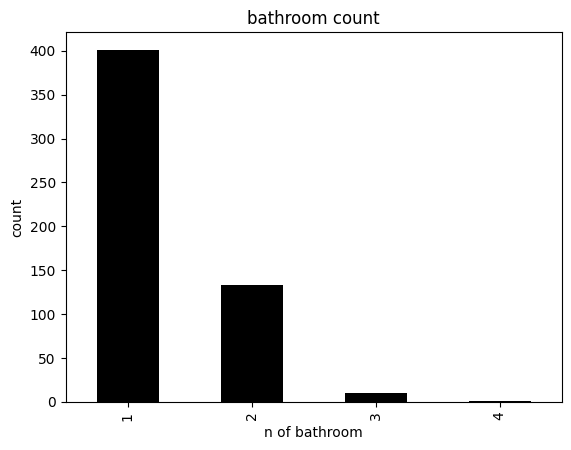

In [ ]:
bathroom=data['bathrooms'].value_counts()
bathroom.plot(kind='bar',color='black')
bathroom_count_sorted=bathroom.sort_index()
bathroom_count_sorted.plot(kind='bar',color='black')
plt.title('bathroom count')
plt.xlabel('n of bathroom')
plt.ylabel('count')
plt.show()

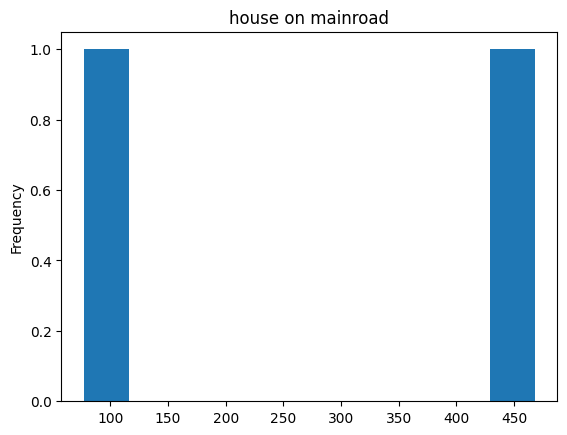

In [ ]:
mainroad=data['mainroad'].value_counts()
mainroad.plot(kind='hist')
plt.title('house on mainroad')
plt.show()

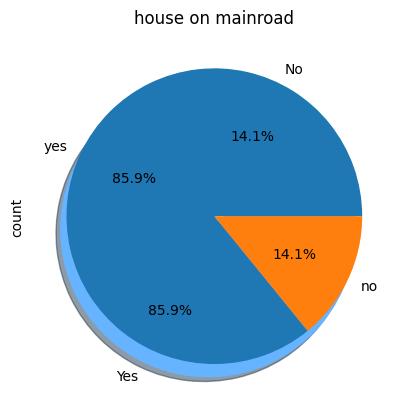

In [ ]:
mainroad=data['mainroad'].value_counts()
colors = ['#66b3ff', '#99ff99']
mainroad.plot(kind='pie', autopct='%1.1f%%', colors=colors, labels=['Yes', 'No'], startangle=90, explode=(0.1, 0), shadow=True)
mainroad.plot(kind='pie',autopct='%1.1f%%')
plt.title('house on mainroad')
plt.show()

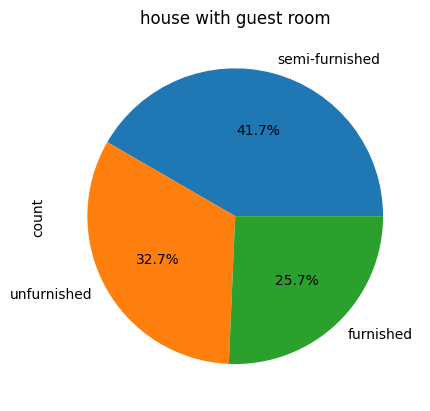

In [ ]:
furnishing=data['furnishingstatus'].value_counts()
colors = ['#66b3ff', '#99ff99']
furnishing.plot(kind='pie',autopct='%1.1f%%')
plt.title('house with guest room')
plt.show()

In [ ]:
encoder=LabelEncoder()



In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
encoding=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for colmn in encoding:
  data[colmn]=encoder.fit_transform(data[colmn])

data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
x=data.drop(columns=['price'],axis=1)
y=data['price']
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [ ]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))
y

NameError: name 'MinMaxScaler' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([[0.29902093],
       [0.47679688],
       [0.11366481],
       [0.24325469],
       [0.13705042],
       [0.15697668],
       [0.33726981],
       [0.40380776],
       [0.08708498],
       [0.07956179],
       [0.67710825],
       [0.09328411],
       [0.12516764],
       [0.13872416],
       [0.17003286],
       [0.30745353],
       [0.10717924],
       [0.26500431],
       [0.22796811],
       [0.15368764],
       [0.3503255 ],
       [0.35411261],
       [0.08746447],
       [0.26083032],
       [0.29911305],
       [0.49918119],
       [0.13027547],
       [0.30183242],
       [0.55658209],
       [0.14581525],
       [0.40640014],
       [0.13818223],
       [0.43223591],
       [0.20821964],
       [0.15923398],
       [0.34962129],
       [0.26133075],
       [0.22871723],
       [0.12706987],
       [0.25006031],
       [0.24001388],
       [0.15508953],
       [0.4751633 ],
       [0.19666803],
       [0.16900249],
       [0.22068221],
       [0.42900468],
       [0.194

In [ ]:
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)

In [ ]:
MAE


0.08482075249315933

In [ ]:
MSE

0.013281243729270746

In [ ]:
accuracy=r2_score(y_test,y_pred)
accuracy

0.6494754192267792

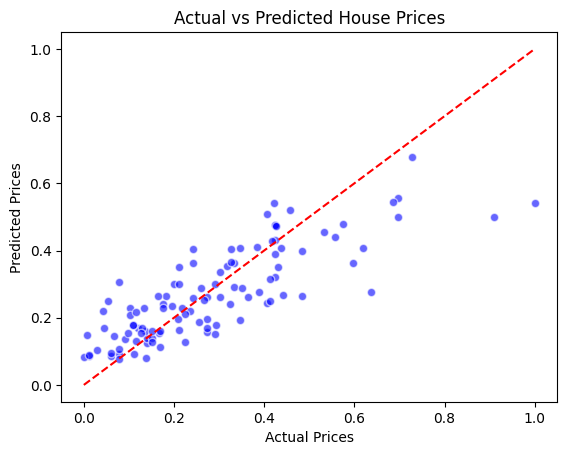

In [ ]:
plt.scatter(y_test, y_pred, color='blue', edgecolor='w', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()